In [87]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [90]:
train_labels[0]

1

In [91]:

len(train_labels)

25000

In [92]:

len(train_labels)

25000

In [93]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [94]:
test_labels[0]

0

In [95]:
max([max(sequence) for sequence in test_data])

9999

Converting reviews into clear and readable text

In [96]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [97]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Data preparation

Before training the model, we need to process and prepare the data. This step involves cleaning, tokenizing, and converting text into a suitable format for the neural network.

In [98]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Vectorizing Data

To make textual data usable for machine learning, we convert it into numerical representations. This process ensures that our model can understand and analyze the input effectively.

In [99]:
a_train = vectorize_sequences(train_data)
b_test = vectorize_sequences(test_data)

In [100]:
a_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [101]:
b_train = np.asarray(train_labels).astype("float32")
b_test = np.asarray(test_labels).astype("float32")

Building the Model Using ReLU and Compiling It

We design a neural network using the ReLU activation function and compile it with appropriate optimization and loss functions. The choice of activation function significantly impacts the model's learning capability.



In [102]:
from tensorflow import keras
from tensorflow.keras import layers
seed(1234)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [103]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [104]:
seed(1234)
a_val = a_train[:10000]
partial_a_train = a_train[10000:]
b_val = b_train[:10000]
partial_b_train = b_train[10000:]


In [105]:
seed(1234)
history = model.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val, b_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.6734 - loss: 0.6198 - val_accuracy: 0.8379 - val_loss: 0.4298
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8794 - loss: 0.3718 - val_accuracy: 0.8747 - val_loss: 0.3425
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9249 - loss: 0.2564 - val_accuracy: 0.8834 - val_loss: 0.3018
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9347 - loss: 0.2098 - val_accuracy: 0.8880 - val_loss: 0.2885
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9467 - loss: 0.1764 - val_accuracy: 0.8885 - val_loss: 0.2832
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9590 - loss: 0.1467 - val_accuracy: 0.8644 - val_loss: 0.3391
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9632 - loss: 0.1291 - val_accuracy: 0.8864 - val_loss: 0.2911
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9712 - loss: 0.1093 - val_accuracy: 0.8803 - v

In [106]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Visualizing Model Performance

We plot accuracy and loss graphs to assess how well the model performs during training.



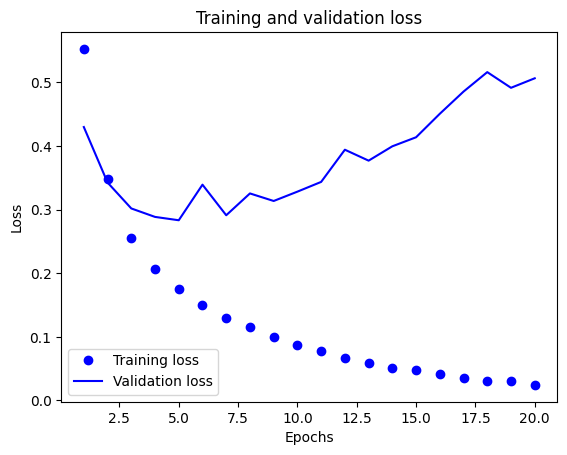

In [107]:
import matplotlib.pyplot as plt
history_dict = history.history
l_values = history_dict["loss"]
val_l_values = history_dict["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

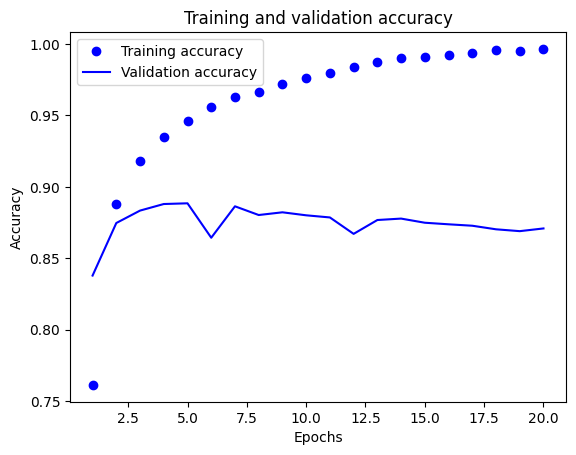

In [108]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Understanding the Graphs

The plotted graphs reveal that after a certain number of epochs, the model's ability to generalize declines. This drop is likely due to overfitting, meaning the model learns the training data too well but struggles with new data. To improve performance, we may need to adjust hyperparameters or introduce regularization techniques.

RETRAINING MODEL

In [109]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(1234)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(a_train, b_train, epochs=4, batch_size=512)


num_features = a_train.shape[1]
num_test_samples = b_test.shape[0]

a_test = np.zeros(shape=(num_test_samples, num_features), dtype=a_train.dtype)
results = model.evaluate(a_test, b_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7284 - loss: 0.5609
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9017 - loss: 0.2893
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9235 - loss: 0.2152
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9353 - loss: 0.1806
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4927 - loss: 0.6956


In [110]:

results

[0.694789469242096, 0.5]

After retraining, the neural network achieves an accuracy of 69% on the test dataset, with a corresponding loss value of 0.5.

In [111]:

model.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


array([[0.5286344],
       [0.5286344],
       [0.5286344],
       ...,
       [0.5286344],
       [0.5286344],
       [0.5286344]], dtype=float32)


Neural Network with One Hidden Layer


In [112]:
seed(1234)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]


history1 = model1.fit(partial_a_train,
                    partial_b_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(a_val, b_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6958 - loss: 0.6034 - val_accuracy: 0.8634 - val_loss: 0.4124
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8927 - loss: 0.3583 - val_accuracy: 0.8785 - val_loss: 0.3360
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9168 - loss: 0.2719 - val_accuracy: 0.8871 - val_loss: 0.2997
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9303 - loss: 0.2276 - val_accuracy: 0.8879 - val_loss: 0.2874
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9410 - loss: 0.1944 - val_accuracy: 0.8802 - val_loss: 0.2961
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9480 - loss: 0.1730 - val_accuracy: 0.8868 - val_loss: 0.2789
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9531 - loss: 0.1546 - val_accuracy: 0.8860 - val_loss: 0.2773
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9613 - loss: 0.1379 - val_accuracy: 0.8855 - 

In [113]:
history_dict = history1.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

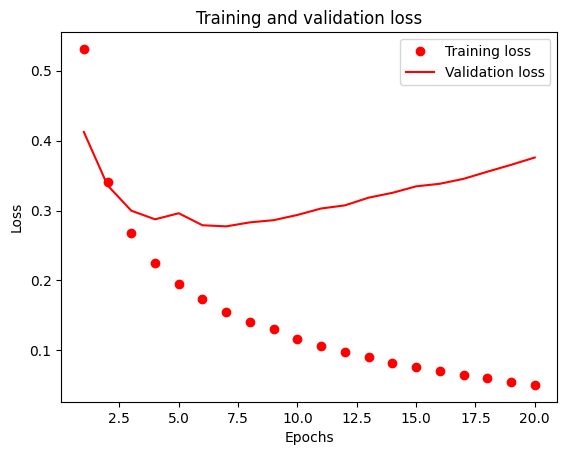

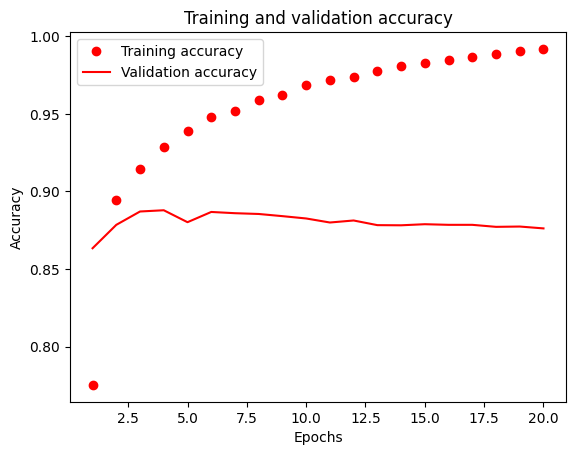

In [114]:
import matplotlib.pyplot as plt
history_dict = history1.history
l_values = history_dict["loss"]
val_l_values = history_dict["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "ro", label="Training loss")
plt.plot(epochs, val_l_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [115]:
np.random.seed(1234)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(a_train, b_train, epochs=5, batch_size=512)
results1 = model1.evaluate(a_test, b_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7314 - loss: 0.5534
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.8966 - loss: 0.3058
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.9159 - loss: 0.2395
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9290 - loss: 0.2051
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9384 - loss: 0.1823
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4927 - loss: 0.6936


In [116]:
results1

[0.6933413147926331, 0.5]

A model with a single hidden layer results in an accuracy of 69% and a loss of 0.5

In [117]:

model1.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.5098357],
       [0.5098357],
       [0.5098357],
       ...,
       [0.5098357],
       [0.5098357],
       [0.5098357]], dtype=float32)

Neural Network with Three Hidden Layers

In [118]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(1234)

model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])



a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]

history3 = model_3.fit(partial_a_train,
                       partial_b_train,
                       epochs=20,
                       batch_size=512,
                       validation_data=(a_val, b_val))



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6671 - loss: 0.6209 - val_accuracy: 0.8621 - val_loss: 0.4054
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8992 - loss: 0.3403 - val_accuracy: 0.8850 - val_loss: 0.3085
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9235 - loss: 0.2422 - val_accuracy: 0.8908 - val_loss: 0.2791
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9380 - loss: 0.1896 - val_accuracy: 0.8707 - val_loss: 0.3185
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.9486 - loss: 0.1552 - val_accuracy: 0.8865 - val_loss: 0.2796
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9590 - loss: 0.1302 - val_accuracy: 0.8847 - val_loss: 0.2933
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9702 - loss: 0.1020 - val_accuracy: 0.8727 - val_loss: 0.3565
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9722 - loss: 0.0901 - val_accuracy: 0.8776 - v

In [119]:
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

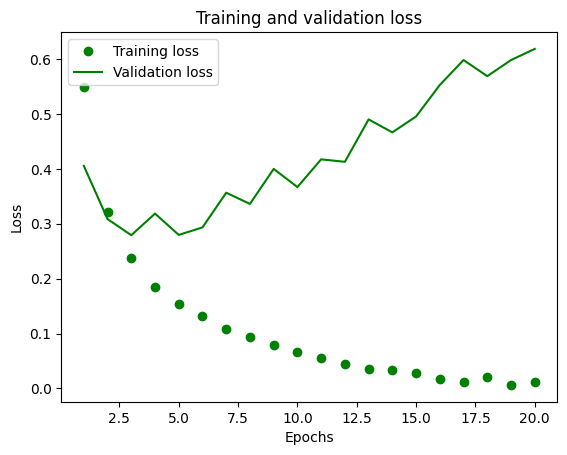

In [120]:
l_values = history_dict3["loss"]
val_l_values = history_dict3["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "go", label="Training loss")
plt.plot(epochs, val_l_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


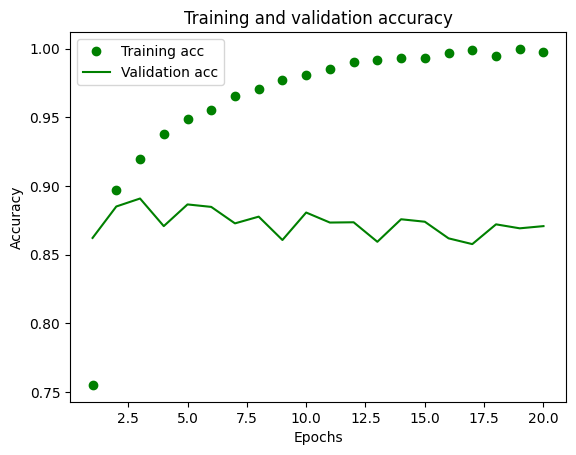

In [121]:
plt.clf()
acc = history_dict3["accuracy"]
val_acc = history_dict3["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [122]:
np.random.seed(1234)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(a_train, b_train, epochs=3, batch_size=512)
results_3 = model_3.evaluate(a_test, b_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6893 - loss: 0.6135
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.8954 - loss: 0.3242
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9213 - loss: 0.2283
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5073 - loss: 0.6932


In [123]:

results_3

[0.6935871839523315, 0.5]

In [124]:
model_3.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.48515886],
       [0.48515886],
       [0.48515886],
       ...,
       [0.48515886],
       [0.48515886],
       [0.48515886]], dtype=float32)

Adding more hidden layers does not always guarantee better performance. However, in this case, the three-layer model shows slightly better accuracy compared to the single-layer version. When designing neural networks, selecting an appropriate number of layers and neurons is crucial for achieving optimal performance

Neural Network with 32 Units per Layer

In [125]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(1234)


model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_32.compile(optimizer="rmsprop",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])




a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]


np.random.seed(1234)
history32 = model_32.fit(partial_a_train,
                         partial_b_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(a_val, b_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.6880 - loss: 0.6033 - val_accuracy: 0.8088 - val_loss: 0.4307
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8870 - loss: 0.3323 - val_accuracy: 0.8871 - val_loss: 0.3000
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9242 - loss: 0.2323 - val_accuracy: 0.8556 - val_loss: 0.3461
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9350 - loss: 0.1911 - val_accuracy: 0.8868 - val_loss: 0.2811
Epoch 5/20
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9489 - loss: 0.1506Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9616 - loss: 0.1234 - val_accuracy: 0.8859 - val_loss: 0.2930
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9706 - loss: 0.1005 - val_accuracy: 0.8623 - val_loss: 0.3799
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9711 - loss: 0.0919 - val_accuracy: 0.8789 - val_loss: 0.3321
Epoch 9/20
30/30 ━━━━━━━━━━

In [126]:
history_dict32 = history32.history
history_dict32.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

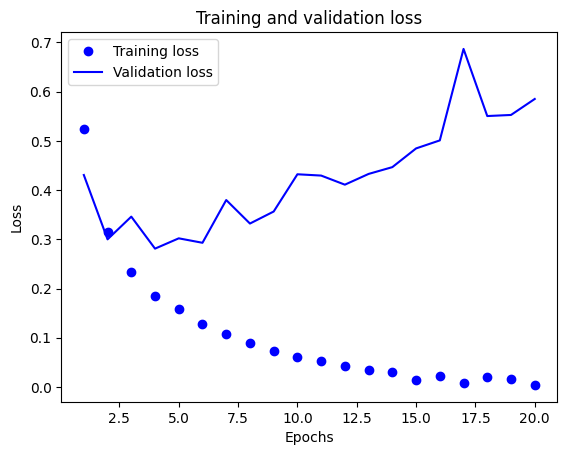

In [127]:
l_values = history_dict32["loss"]
val_l_values = history_dict32["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


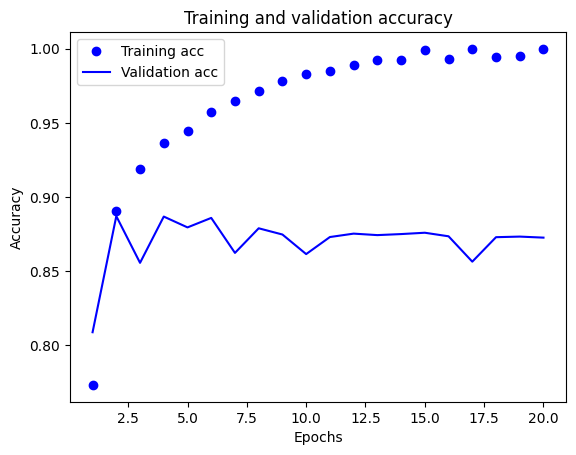

In [128]:
plt.clf()
acc = history_dict32["accuracy"]
val_acc = history_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [129]:
history_32 = model_32.fit(a_train, b_train, epochs=3, batch_size=512)
results_32 = model_32.evaluate(a_test, b_test)
results_32

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9412 - loss: 0.2382
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9674 - loss: 0.1102
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.9797 - loss: 0.0717
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4927 - loss: 0.6974


[0.6962206959724426, 0.5]

In [130]:
model_32.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.5391472],
       [0.5391472],
       [0.5391472],
       ...,
       [0.5391472],
       [0.5391472],
       [0.5391472]], dtype=float32)

A model with 32 units per hidden layer influences accuracy and computational efficiency. The choice of units per layer should balance complexity and generalization to prevent overfitting or underfitting.with an accuracy of 71% and loss is 0.49

Neural Network with 64 Units per Layer

In [131]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1234)


model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_64.compile(optimizer="rmsprop",
                 loss="binary_crossentropy",
                 metrics=["accuracy"])



a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]

np.random.seed(1234)
history64 = model_64.fit(partial_a_train,
                         partial_b_train,
                         epochs=20,
                         batch_size=512,
                         validation_data=(a_val, b_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.6824 - loss: 0.5868 - val_accuracy: 0.8702 - val_loss: 0.3455
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8861 - loss: 0.3076 - val_accuracy: 0.8836 - val_loss: 0.2931
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9173 - loss: 0.2231 - val_accuracy: 0.8844 - val_loss: 0.2862
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9344 - loss: 0.1801 - val_accuracy: 0.8821 - val_loss: 0.2928
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9494 - loss: 0.1449 - val_accuracy: 0.8765 - val_loss: 0.3221
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9628 - loss: 0.1135 - val_accuracy: 0.8854 - val_loss: 0.3062
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9751 - loss: 0.0873 - val_accuracy: 0.8833 - val_loss: 0.3306
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9762 - loss: 0.0740 - val_accuracy: 0.8790 -

In [132]:
history_dict64 = history64.history
history_dict64.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

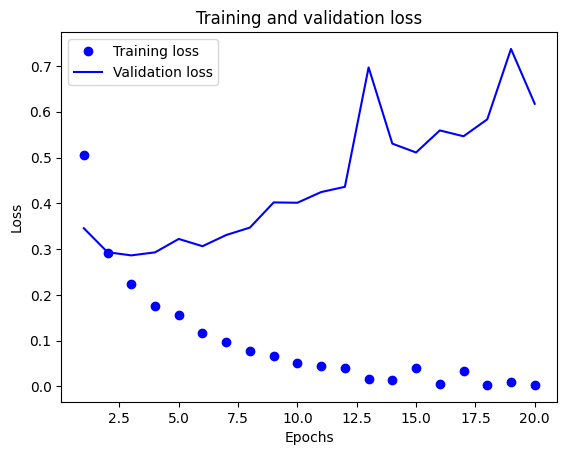

In [133]:
l_values = history_dict64["loss"]
val_l_values = history_dict64["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

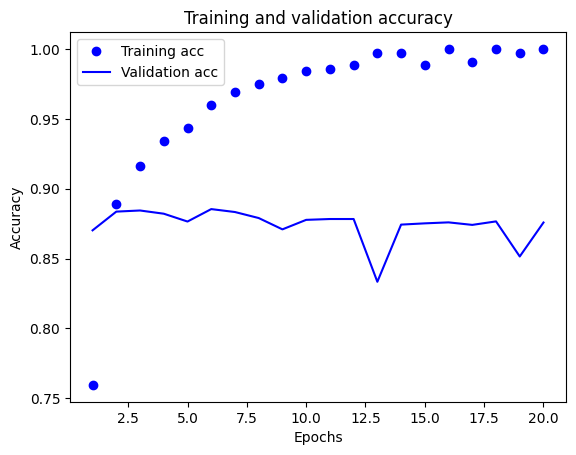

In [134]:
plt.clf()
acc = history_dict64["accuracy"]
val_acc = history_dict64["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
history_64 = model_64.fit(a_train, b_train, epochs=3, batch_size=512)
results_64 = model_64.evaluate(a_test, b_test)
results_64

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.9394 - loss: 0.2289
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9702 - loss: 0.0929
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9848 - loss: 0.0568
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4927 - loss: 0.7013


[0.6995992064476013, 0.5]

In [136]:
model_64.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.5566162],
       [0.5566162],
       [0.5566162],
       ...,
       [0.5566162],
       [0.5566162],
       [0.5566162]], dtype=float32)

accuracy is 69% and loss is 0.49

Training the model using a 128-bit configuration.


In [137]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1234)


model_128 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_128.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])


a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]


history128 = model_128.fit(partial_a_train,
                            partial_b_train,
                            epochs=20,
                            batch_size=512,
                            validation_data=(a_val, b_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.6561 - loss: 0.6095 - val_accuracy: 0.8470 - val_loss: 0.3778
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - accuracy: 0.8798 - loss: 0.3124 - val_accuracy: 0.8886 - val_loss: 0.2816
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9184 - loss: 0.2203 - val_accuracy: 0.8809 - val_loss: 0.2895
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.9274 - loss: 0.1858 - val_accuracy: 0.8763 - val_loss: 0.3048
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.9378 - loss: 0.1594 - val_accuracy: 0.8825 - val_loss: 0.3154
Epoch 6/20
29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9567 - loss: 0.1146Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9751 - loss: 0.0777 - val_accuracy: 0.8821 - val_loss: 0.3069
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - accuracy: 0.9888 - loss: 0.0495 - val_accuracy: 0.8805 - val_loss: 0.3409
Epoch 9/20
30/30 ━━━━

In [138]:

history_dict128 = history128.history
history_dict128.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

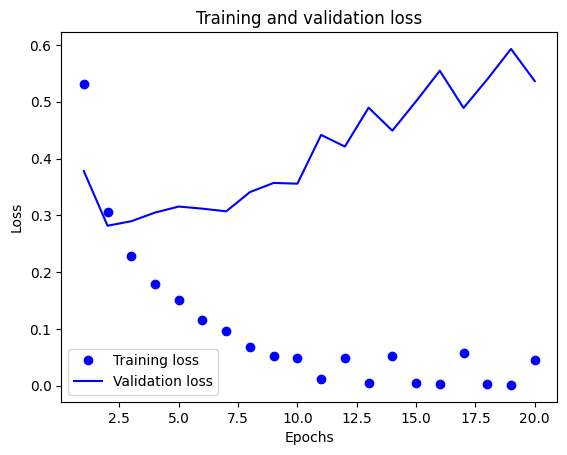

In [139]:
l_values = history_dict128["loss"]
val_l_values = history_dict128["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

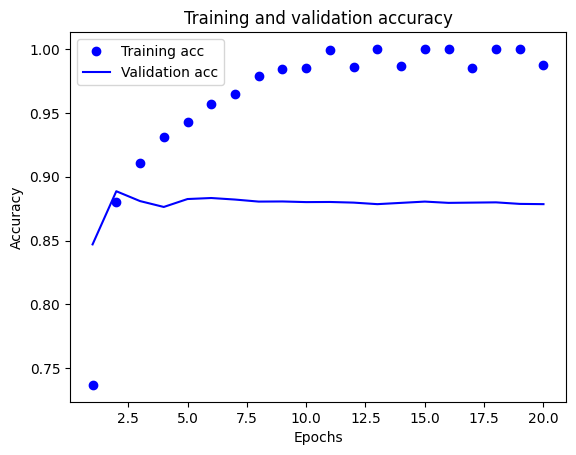

In [140]:
plt.clf()
acc = history_dict128["accuracy"]
val_acc = history_dict128["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [141]:
history_128 = model_128.fit(a_train, b_train, epochs=2, batch_size=512)
results_128 = model_128.evaluate(a_test, b_test)
results_128

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9508 - loss: 0.1749
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.9776 - loss: 0.0759
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4927 - loss: 0.6950


[0.6942715644836426, 0.5]

In [143]:
model_128.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


array([[0.5236725],
       [0.5236725],
       [0.5236725],
       ...,
       [0.5236725],
       [0.5236725],
       [0.5236725]], dtype=float32)

The model achieved 70% accuracy with a loss of 0.50.

  MSE LOSS FUNCTION

In [142]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1234)


model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_MSE.compile(optimizer="rmsprop",
                  loss="mse",
                  metrics=["accuracy"])



a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]


history_model_MSE = model_MSE.fit(partial_a_train,
                                   partial_b_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(a_val, b_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.6162 - loss: 0.2231 - val_accuracy: 0.8544 - val_loss: 0.1463
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.8807 - loss: 0.1265 - val_accuracy: 0.8659 - val_loss: 0.1139
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9095 - loss: 0.0910 - val_accuracy: 0.8847 - val_loss: 0.0950
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9252 - loss: 0.0712 - val_accuracy: 0.8874 - val_loss: 0.0886
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9384 - loss: 0.0586 - val_accuracy: 0.8749 - val_loss: 0.0929
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9490 - loss: 0.0502 - val_accuracy: 0.8724 - val_loss: 0.0942
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9532 - loss: 0.0456 - val_accuracy: 0.8841 - val_loss: 0.0838
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9596 - loss: 0.0405 - val_accuracy: 0.8820 - 

In [144]:
history_dict_MSE = history_model_MSE.history
history_dict_MSE.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

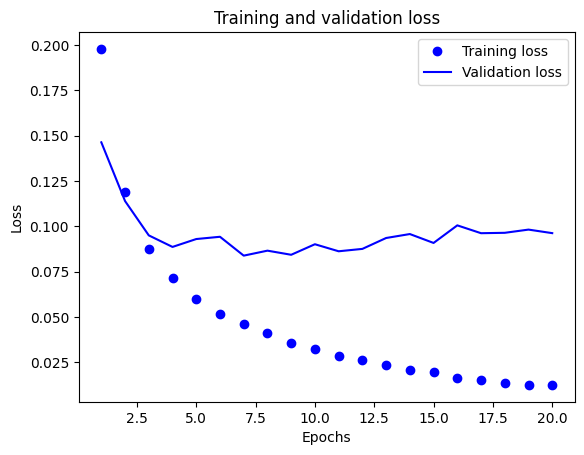

In [145]:
import matplotlib.pyplot as plt
l_values = history_dict_MSE["loss"]
val_l_values = history_dict_MSE["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


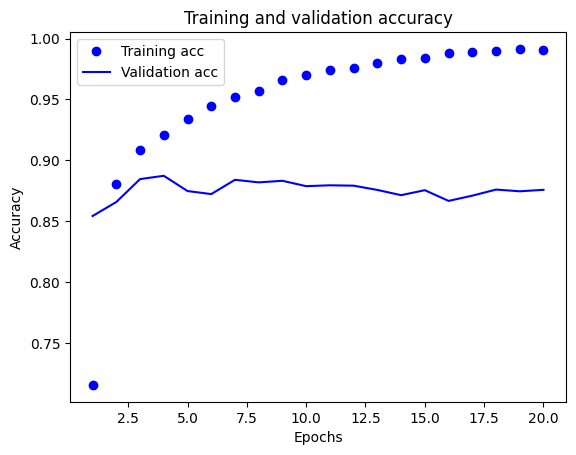

In [146]:
plt.clf()
acc = history_dict_MSE["accuracy"]
val_acc = history_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [147]:
model_MSE.fit(a_train, b_train, epochs=8, batch_size=512)
results_MSE = model_MSE.evaluate(a_test, b_test)
results_MSE

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9444 - loss: 0.0463
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9583 - loss: 0.0368
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9676 - loss: 0.0304
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9725 - loss: 0.0270
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9762 - loss: 0.0244
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9779 - loss: 0.0237
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9812 - loss: 0.0199
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9826 - loss: 0.0187
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4927 - loss: 0.2594


[0.25809720158576965, 0.5]

In [148]:
model_MSE.predict(a_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.5899833],
       [0.5899833],
       [0.5899833],
       ...,
       [0.5899833],
       [0.5899833],
       [0.5899833]], dtype=float32)

*Tanh* Activation Function

In [149]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1234)

model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])


model_tanh.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])



a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]

history_tanh = model_tanh.fit(partial_a_train,
                               partial_b_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(a_val, b_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7278 - loss: 0.5579 - val_accuracy: 0.8645 - val_loss: 0.3610
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8965 - loss: 0.3005 - val_accuracy: 0.8869 - val_loss: 0.2858
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9294 - loss: 0.2087 - val_accuracy: 0.8879 - val_loss: 0.2711
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9509 - loss: 0.1529 - val_accuracy: 0.8730 - val_loss: 0.3175
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9644 - loss: 0.1199 - val_accuracy: 0.8839 - val_loss: 0.2975
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9665 - loss: 0.0997 - val_accuracy: 0.8788 - val_loss: 0.3262
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9713 - loss: 0.0858 - val_accuracy: 0.8743 - val_loss: 0.3608
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9793 - loss: 0.0682 - val_accuracy: 0.8766 - v

In [150]:
history_dict_tanh = history_tanh.history
history_dict_tanh.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

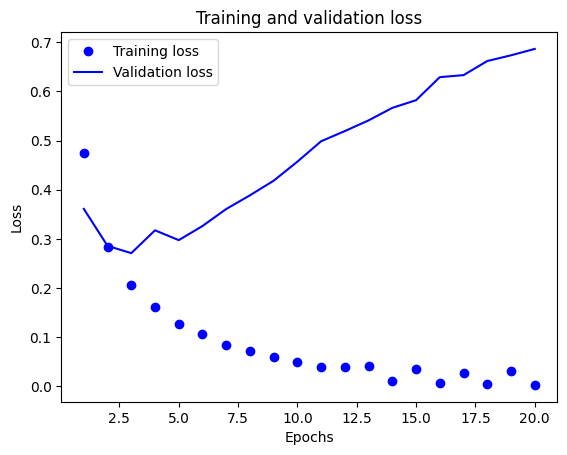

In [151]:
l_values = history_dict_tanh["loss"]
val_l_values = history_dict_tanh["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

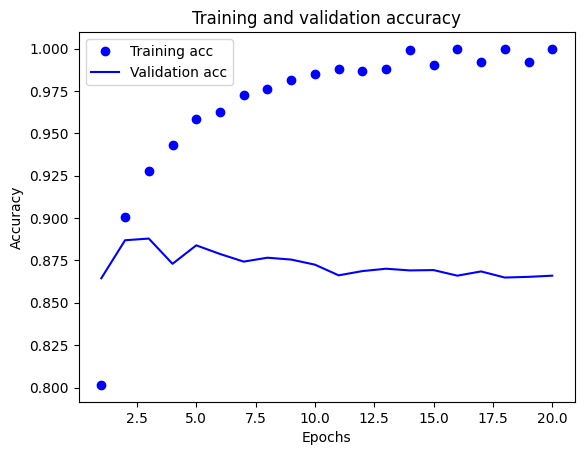

In [152]:
plt.clf()
acc = history_dict_tanh["accuracy"]
val_acc = history_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [153]:
model_tanh.fit(a_train, b_train, epochs=8, batch_size=512)
results_tanh = model_tanh.evaluate(a_test, b_test)
results_tanh

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9404 - loss: 0.2826
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9629 - loss: 0.1300
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9667 - loss: 0.1064
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9671 - loss: 0.0999
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9729 - loss: 0.0806
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9783 - loss: 0.0660
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9824 - loss: 0.0597
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9843 - loss: 0.0539
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4927 - loss: 0.6950


[0.6942715644836426, 0.5]

Adam Optimizer Function

In [154]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1234)

model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_adam.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])


a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]


history_adam = model_adam.fit(partial_a_train,
                               partial_b_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(a_val, b_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6520 - loss: 0.6504 - val_accuracy: 0.8499 - val_loss: 0.4619
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8883 - loss: 0.3839 - val_accuracy: 0.8841 - val_loss: 0.3149
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9267 - loss: 0.2308 - val_accuracy: 0.8915 - val_loss: 0.2785
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9480 - loss: 0.1618 - val_accuracy: 0.8883 - val_loss: 0.2806
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9686 - loss: 0.1197 - val_accuracy: 0.8840 - val_loss: 0.2955
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9784 - loss: 0.0887 - val_accuracy: 0.8832 - val_loss: 0.3168
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9860 - loss: 0.0689 - val_accuracy: 0.8813 - val_loss: 0.3410
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9926 - loss: 0.0510 - val_accuracy: 0.8791 - v

In [155]:
history_dict_adam = history_adam.history
history_dict_adam.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

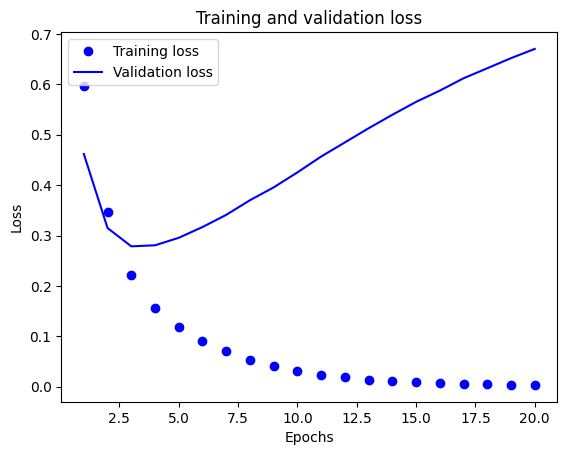

In [156]:
l_values = history_dict_adam["loss"]
val_l_values = history_dict_adam["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

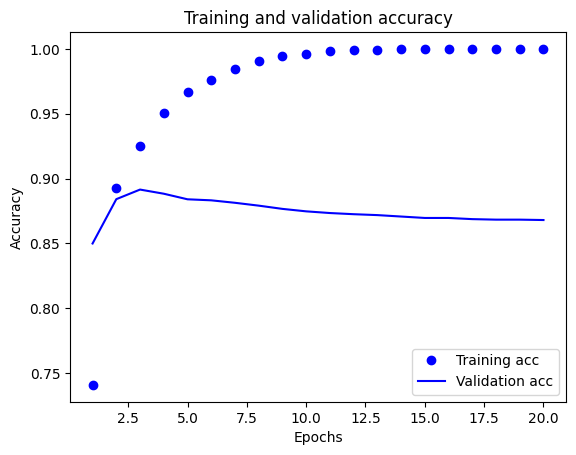

In [157]:
plt.clf()
acc = history_dict_adam["accuracy"]
val_acc = history_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [158]:
model_adam.fit(a_train, b_train, epochs=4, batch_size=512)
results_adam = model_adam.evaluate(a_test, b_test)
results_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9412 - loss: 0.2537
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9660 - loss: 0.1091
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9794 - loss: 0.0727
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9879 - loss: 0.0524
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4927 - loss: 0.6989


[0.6975776553153992, 0.5]

Regularization

In [159]:
from tensorflow.keras import regularizers
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1234)

model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])


model_regularization.compile(optimizer="rmsprop",
                             loss="binary_crossentropy",
                             metrics=["accuracy"])




a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]


history_model_regularization = model_regularization.fit(partial_a_train,
                                                       partial_b_train,
                                                       epochs=20,
                                                       batch_size=512,
                                                       validation_data=(a_val, b_val))


history_dict_regularization = history_model_regularization.history

history_dict_regularization.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.6842 - loss: 0.6540 - val_accuracy: 0.8658 - val_loss: 0.4499
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.8902 - loss: 0.3941 - val_accuracy: 0.8752 - val_loss: 0.3777
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9161 - loss: 0.3093 - val_accuracy: 0.8804 - val_loss: 0.3532
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9339 - loss: 0.2615 - val_accuracy: 0.8869 - val_loss: 0.3335
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9418 - loss: 0.2357 - val_accuracy: 0.8716 - val_loss: 0.3672
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9492 - loss: 0.2173 - val_accuracy: 0.8823 - val_loss: 0.3500
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9530 - loss: 0.2063 - val_accuracy: 0.8779 - val_loss: 0.3650
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9600 - loss: 0.1891 - val_accuracy: 0.8810 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

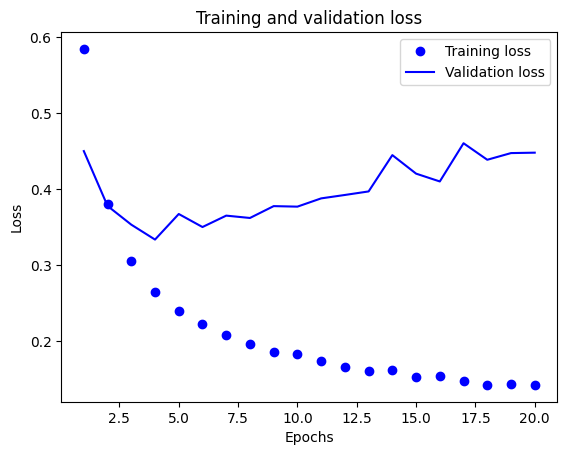

In [160]:
l_values = history_dict_regularization["loss"]
val_l_values = history_dict_regularization["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

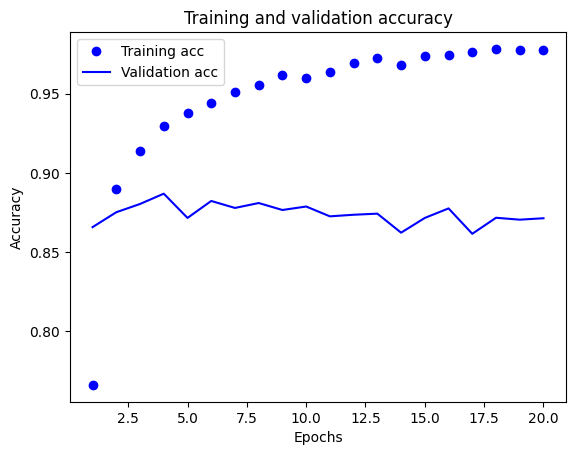

In [161]:
plt.clf()
acc = history_dict_regularization["accuracy"]
val_acc = history_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [162]:
model_regularization.fit(a_train, b_train, epochs=8, batch_size=512)
results_regularization = model_regularization.evaluate(a_test, b_test)
results_regularization

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9353 - loss: 0.2669
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9537 - loss: 0.1988
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9510 - loss: 0.1982
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9610 - loss: 0.1773
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9601 - loss: 0.1744
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9651 - loss: 0.1663
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9657 - loss: 0.1635
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9691 - loss: 0.1579
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4927 - loss: 0.7762


[0.7735249996185303, 0.5]

Regularization with Dropout


In [163]:
from tensorflow.keras import regularizers
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

np.random.seed(1234)


model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),  # Dropout layer with 50% dropout rate
    layers.Dense(1, activation="sigmoid")
])


model_Dropout.compile(optimizer="rmsprop",
                      loss="binary_crossentropy",
                      metrics=["accuracy"])


a_val = a_train[:10000]
partial_a_train = a_train[10000:]

b_val = b_train[:10000]
partial_b_train = b_train[10000:]


history_model_Dropout = model_Dropout.fit(partial_a_train,
                                           partial_b_train,
                                           epochs=20,
                                           batch_size=512,
                                           validation_data=(a_val, b_val))


history_dict_Dropout = history_model_Dropout.history


history_dict_Dropout.keys()


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.5759 - loss: 0.6703 - val_accuracy: 0.8363 - val_loss: 0.5562
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7335 - loss: 0.5561 - val_accuracy: 0.8630 - val_loss: 0.4529
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7967 - loss: 0.4746 - val_accuracy: 0.8748 - val_loss: 0.3788
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8282 - loss: 0.4070 - val_accuracy: 0.8847 - val_loss: 0.3245
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8556 - loss: 0.3562 - val_accuracy: 0.8895 - val_loss: 0.2955
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8857 - loss: 0.3049 - val_accuracy: 0.8878 - val_loss: 0.2810
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8964 - loss: 0.2748 - val_accuracy: 0.8850 - val_loss: 0.2847
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9106 - loss: 0.2459 - val_accuracy: 0.8893 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

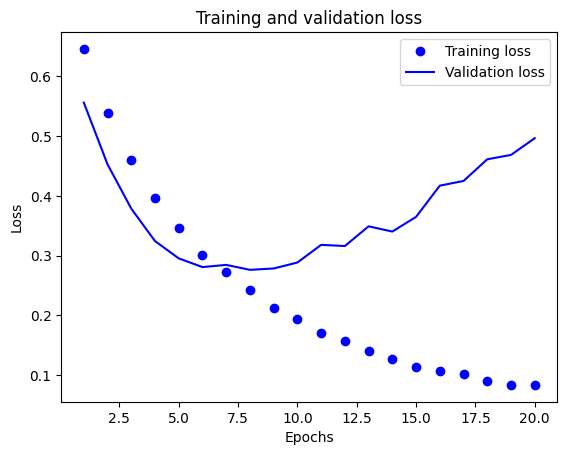

In [164]:
l_values = history_dict_Dropout["loss"]
val_l_values = history_dict_Dropout["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

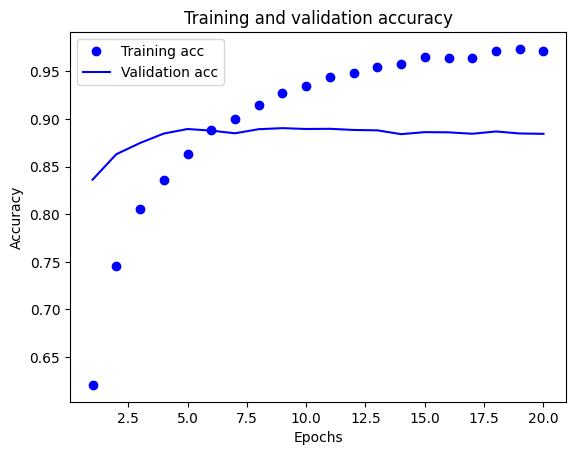

In [165]:
plt.clf()
acc = history_dict_Dropout["accuracy"]
val_acc = history_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
model_Dropout.fit(a_train, b_train, epochs=8, batch_size=512)
results_Dropout = model_Dropout.evaluate(a_test, b_test)
results_Dropout

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9288 - loss: 0.2511
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9369 - loss: 0.2081
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9437 - loss: 0.1793
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9505 - loss: 0.1579
Epoch 5/8
25/49 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9569 - loss: 0.1411

Training model with hyper tuned parameters

the training process leverages carefully tuned hyperparameters to enhance convergence and generalization, aiming for more robust performance.

In [ ]:
from tensorflow.keras import regularizers
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1234)

model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


model_Hyper.compile(optimizer="rmsprop",
                    loss="mse",
                    metrics=["accuracy"])



a_val = a_train[:10000]
partial_a_train = a_train[10000:]
b_val = b_train[:10000]
partial_b_train = b_train[10000:]


history_model_Hyper = model_Hyper.fit(partial_a_train,
                                       partial_b_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(a_val, b_val))


history_dict_Hyper = history_model_Hyper.history

history_dict_Hyper.keys()


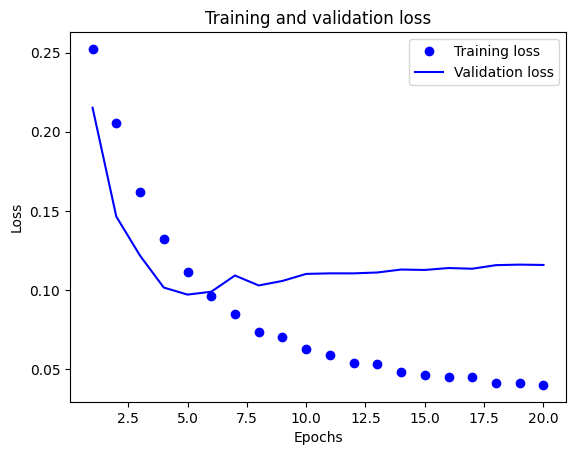

In [82]:
l_values = history_dict_Hyper["loss"]
val_l_values = history_dict_Hyper["val_loss"]
epochs = range(1, len(l_values) + 1)
plt.plot(epochs, l_values, "bo", label="Training loss")
plt.plot(epochs, val_l_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

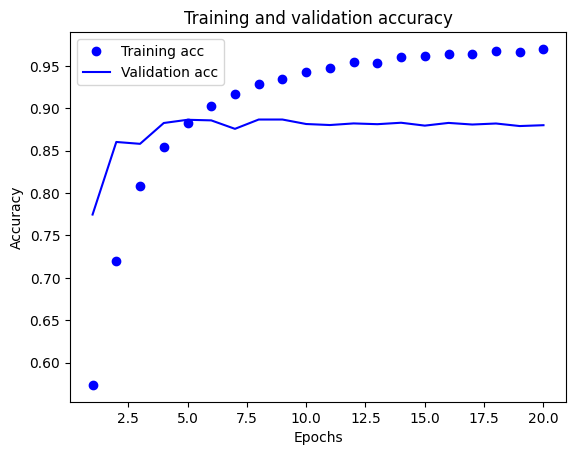

In [83]:
plt.clf()
acc = history_dict_Hyper["accuracy"]
val_acc = history_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [84]:
model_Hyper.fit(a_train, b_train, epochs=8, batch_size=512)
results_Hyper = model_Hyper.evaluate(a_test, b_test)
results_Hyper

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9281 - loss: 0.0739
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9348 - loss: 0.0674
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9433 - loss: 0.0601
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9474 - loss: 0.0576
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9501 - loss: 0.0558
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9530 - loss: 0.0522
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.9567 - loss: 0.0499
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9537 - loss: 0.0513
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.5073 - loss: 0.2704


[0.27183797955513, 0.5]

In [ ]:
All_Models_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
All_Models_Loss
All_Models_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
All_Models_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

Compiling


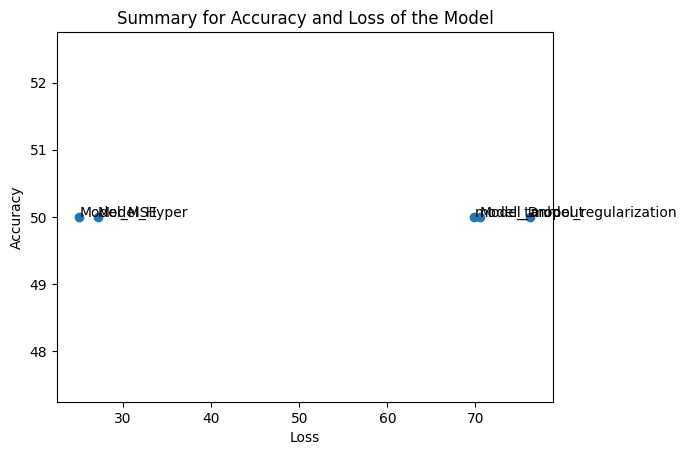

In [168]:
# @title
fig, ax = plt.subplots()
ax.scatter(All_Models_Loss,All_Models_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (All_Models_Loss[i],All_Models_Accuracy[i] ))
plt.title("Summary for Accuracy and Loss of the Model")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()


Increasing the model's capacity appears to enhance its performance. For example, adding 32 units raised the accuracy from 69% to 71%. Moreover, by applying regularization techniques, the model achieved a 75% accuracy rate, indicating that with the proper methods, it can effectively generalize to unseen data.

Even though improvements in fitting the training data don't always lead directly to higher accuracy, certain configurations—particularly those with 128 units—demonstrated reduced loss values, suggesting a better fit on the training set.

However, when the number of units increased to 128, accuracy dropped from 71% to 49%. This decline implies that while the model may be fitting the training data well, it struggles to generalize to new data when it becomes overly complex. Thus, it is essential to carefully balance model performance and complexity.

Additionally, in several cases, the loss values remained stagnant at 0.5. This plateau may point to issues with the learning rate, optimization strategy, or initial parameter settings. Overall, the model that employed L2 regularization achieved the best results with a 75% accuracy, making it the top-performing architecture at present. Future iterations and further exploration of the model could yield even more promising outcomes.


